In [15]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt; 
import seaborn as sns; sns.set()
import pandas as pd
plt.rcdefaults()
%matplotlib inline

import PIL
import glob
import scikitplot as skplt

In [16]:
X_input = []
input_names = ["Band 1_11", "Band 1_12", "Band 1_13", 
               "Band 1_21", "Band 1_22", "Band 1_23",
               "Band 1_31", "Band 1_32", "Band 1_33",
               
               
               "Band 2_11", "Band 2_12", "Band 2_13", 
               "Band 2_21", "Band 2_22", "Band 2_23",
               "Band 2_31", "Band 2_32", "Band 2_33",
               
               "Band 3_11", "Band 3_12", "Band 3_13", 
               "Band 3_21", "Band 3_22", "Band 3_23",
               "Band 3_31", "Band 3_32", "Band 3_33",
               
               "Band 4_11", "Band 4_12", "Band 4_13", 
               "Band 4_21", "Band 4_22", "Band 4_23",
               "Band 4_31", "Band 4_32", "Band 4_33",
               
               "Band 6_11", "Band 6_12", "Band 6_13", 
               "Band 6_21", "Band 6_22", "Band 6_23",
               "Band 6_31", "Band 6_32", "Band 6_33",
               
               
               "MRH_11", "MRH_12", "MRH_13", 
               "MRH_21", "MRH_22", "MRH_23",
               "MRH_31", "MRH_32", "MRH_33",
               
               "MSH_11", "MSH_12", "MSH_13", 
               "MSH_21", "MSH_22", "MSH_23",
               "MSH_31", "MSH_32", "MSH_33",
               
               "MTE_11", "MTE_12", "MTE_13", 
               "MTE_21", "MTE_22", "MTE_23",
               "MTE_31", "MTE_32", "MTE_33",
               
               "MVI_11", "MVI_12", "MVI_13", 
               "MVI_21", "MVI_22", "MVI_23",
               "MVI_31", "MVI_32", "MVI_33"]

X_names = np.asarray(input_names)

Y_output = []

In [17]:
folder = "../satyam_rad_sat_mod_npy/"
Sa1_files = glob.glob("../satyam_rad_sat_mod_npy/sa1_npy/*")
Sa1_files

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030920.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030919.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031318.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031319.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031320.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032716.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032718.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [18]:
len(Sa1_files)

349

In [19]:
for filename in Sa1_files:
    filename = filename.split('/')[-1]
    
    # Satellite 1
    Sa_1_File = folder + "sa1_npy/" + filename;
    Sa1arr = np.load(Sa_1_File)
    
    
    # Satellite 2
    Sa_2_File = folder + "sa2_npy/" + filename;
    Sa2arr = np.load(Sa_2_File)
    
    
    # Satellite 3
    Sa_3_File = folder + "sa3_npy/" + filename;
    Sa3arr = np.load(Sa_3_File)
    
    # Satellite 4
    Sa_4_File = folder + "sa4_npy/" + filename;
    Sa4arr = np.load(Sa_4_File)
    
    # Satellite 6
    Sa_6_File = folder + "sa6_npy/" + filename;
    Sa6arr = np.load(Sa_6_File)
    
    
    
    # MRH
    MRH_File = folder + "mrh_npy/" + filename.replace('sat', "mod", 1)
    MRHarr = np.load(MRH_File)
    
    # MSH
    MSH_File = folder + "msh_npy/" + filename.replace('sat', "mod", 1)
    MSHarr = np.load(MSH_File)
    
    # MTE
    MTE_File = folder + "tem_npy/" + filename.replace('sat', "mod", 1)
    MTEarr = np.load(MTE_File)
    
    # MVI
    MVI_File = folder + "vis_npy/" + filename.replace('sat', "mod", 1)
    MVIarr = np.load(MVI_File)
    
    # Radar
    Radar_File = folder + "rad_npy/" + filename.replace('sat', "rad", 1)
    Radararr = np.load(Radar_File)
    
    rows = len(Sa1arr);
    cols = len(Sa1arr[0]);
    
    for row in range(1, rows-1):
        for col in range(1, cols-1):
            x = [];
            
            # Sa1
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa1arr[row_][col_])
                    
            # Sa2
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa2arr[row_][col_])
                    
                    
            # Sa3
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa3arr[row_][col_])
                    
            # Sa4
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa4arr[row_][col_])
                    
            # Sa6
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa6arr[row_][col_])
                    
                    
                    
                    
            # MRH
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(MRHarr[row_][col_])    
                    
            # MSH
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(MSHarr[row_][col_])
                    
                    
            # MTE
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(MTEarr[row_][col_])
                    
                    
            # MVI
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(MVIarr[row_][col_])
                    

        
            Y_output.append(Radararr[row][col])        
            X_input.append(x)

In [20]:
X_input = np.array(X_input)
Y_output = np.array(Y_output)

In [21]:
print(X_input.shape)
print(np.std(X_input))
print(np.min(X_input))
print(np.mean(X_input))
print(np.max(X_input))

(64516, 81)
7555.91
0.0011697337
7737.4287
26499.057


In [22]:
print(Y_output.shape)
print(np.std(Y_output))
print(np.min(Y_output))
print(np.mean(Y_output))
print(np.max(Y_output))

(64516,)
3.4846494001711563
0
7.702337404674809
58


In [23]:
Y_output_no_zero = list(filter(lambda a: a != 0, Y_output))
print(np.shape(Y_output_no_zero))
print(np.std(Y_output_no_zero))
print(np.min(Y_output_no_zero))
print(np.mean(Y_output_no_zero))
print(np.max(Y_output_no_zero))

(64515,)
3.484544457335869
2
7.702456792993877
58


In [24]:
thershold = np.mean(Y_output_no_zero) + 2 * np.std(Y_output_no_zero)
thershold

14.671545707665615

In [25]:
# Feature Importance

In [26]:
rf = RandomForestRegressor()
rf.fit(X_input, Y_output)

/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
for feat, score in zip(X_names, rf.feature_importances_):
    print('{}       {}'.format(feat, score))

Band 1_11       0.003359238661659399
Band 1_12       0.004229235582898399
Band 1_13       0.0037534734642890753
Band 1_21       0.0023543013737071772
Band 1_22       0.0026851766646244293
Band 1_23       0.002631664473543318
Band 1_31       0.0024927776881310502
Band 1_32       0.002066544207330262
Band 1_33       0.006252920548680157
Band 2_11       0.003979088357168936
Band 2_12       0.0028649424372013672
Band 2_13       0.005530951208820981
Band 2_21       0.00257289188576773
Band 2_22       0.0018924610845491296
Band 2_23       0.0038472770386260347
Band 2_31       0.0030274930427734606
Band 2_32       0.0045634652580679265
Band 2_33       0.003782367922323881
Band 3_11       0.04473255888448745
Band 3_12       0.01676585077608702
Band 3_13       0.020201534070966275
Band 3_21       0.01045209300181606
Band 3_22       0.005385151984931955
Band 3_23       0.006552790282956122
Band 3_31       0.006117940512503315
Band 3_32       0.006335052557600025
Band 3_33       0.021142713903700

In [28]:
# Test Train Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_input, Y_output, test_size=0.30, random_state=42)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45161, 81)
(19355, 81)
(45161,)
(19355,)


In [31]:
rf_train = RandomForestRegressor()
rf_train.fit(X_train, y_train)

/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
### Save the trained model

In [33]:
import pickle
filename = 'MODEL_70_Random_Forest_3x3_overlap_npy.sav'
pickle.dump(rf_train, open(filename, 'wb'))

In [34]:
len(input_names)

81

In [35]:
rf.feature_importances_.shape

(81,)

In [36]:
max_heat = np.max(rf.feature_importances_)
max_heat

0.19990816828113384

In [37]:
feature_heatmap = rf.feature_importances_.reshape((27,3))

Text(0.5, 1.0, 'Band 1')

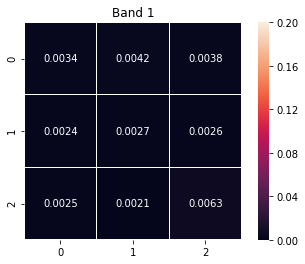

In [38]:
sns.heatmap(feature_heatmap[0:3], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('Band 1')

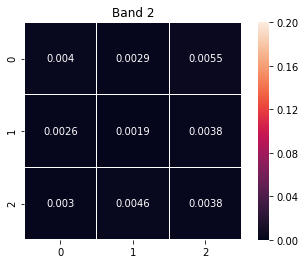

In [39]:
g2 = sns.heatmap(feature_heatmap[3:6], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('Band 2')

Text(0.5, 1.0, 'Band 3')

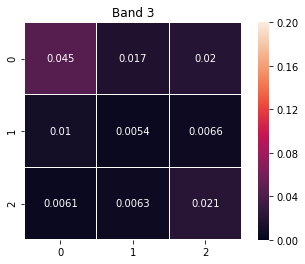

In [40]:
sns.heatmap(feature_heatmap[6:9], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('Band 3')

Text(0.5, 1.0, 'Band 4')

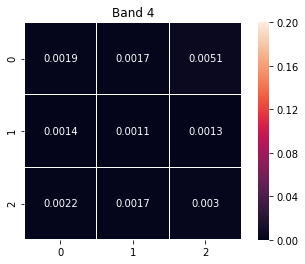

In [41]:
sns.heatmap(feature_heatmap[9:12], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('Band 4')

Text(0.5, 1.0, 'Band 6')

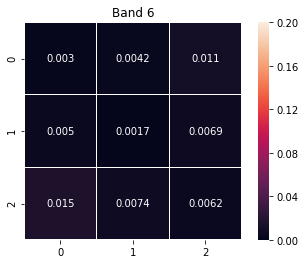

In [42]:
sns.heatmap(feature_heatmap[12:15], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('Band 6')

Text(0.5, 1.0, 'MRH')

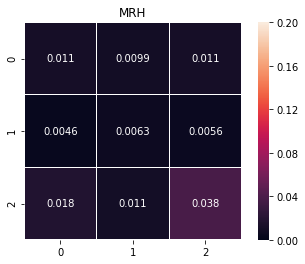

In [43]:
sns.heatmap(feature_heatmap[15:18], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('MRH')

Text(0.5, 1.0, 'MSH')

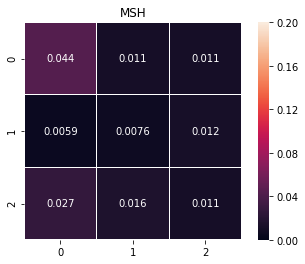

In [44]:
sns.heatmap(feature_heatmap[18:21], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('MSH')

Text(0.5, 1.0, 'MTE')

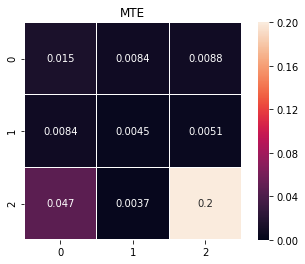

In [45]:
sns.heatmap(feature_heatmap[21:24], linewidths=.01, annot=True, square="true", vmin=0, vmax=max_heat).set_title('MTE')

Text(0.5, 1.0, 'MVI')

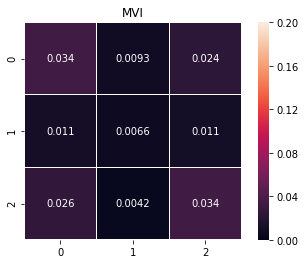

In [ ]:
# Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_input, Y_output, test_size=0.30, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
rf_train = RandomForestRegressor()
rf_train.fit(X_train, y_train)

In [ ]:
### Save the trained model

In [ ]:
import pickle
filename = 'MODEL_70_Random_Forest_3x3_npy_overlap.sav'
pickle.dump(rf_train, open(filename, 'wb'))

In [ ]:
predictions_train = rf_train.predict(X_train)

In [ ]:
predictions_train.shape

In [ ]:
errors_train = abs(predictions_train - y_train)

In [ ]:
np.mean(errors_train)

In [ ]:
np.max(errors_train)

In [ ]:
plt.hist(errors_train, bins=range(0, 20, 1), density=1)

In [ ]:
### Confusion Matrix

In [ ]:
y_train_copy = np.copy(y_train)
y_train_copy[y_train_copy < thershold] = 0
y_train_copy[y_train_copy >= thershold] = 1

predictions_train_copy = np.copy(predictions_train)
predictions_train_copy[predictions_train_copy < thershold] = 0
predictions_train_copy[predictions_train_copy >= thershold] = 1

skplt.metrics.plot_confusion_matrix(y_train_copy, predictions_train_copy, normalize=True)
plt.show()

In [ ]:
# Evaluation on Test

In [ ]:
predictions_test = rf_train.predict(X_test)
predictions_test.shape

In [ ]:
y_test.shape

In [ ]:
errors_test = abs(predictions_test - y_test)

In [ ]:
print(errors_test.shape)
print(np.std(errors_test))
print(np.min(errors_test))
print(np.mean(errors_test))
print(np.max(errors_test))

In [ ]:
plt.hist(errors_test, bins='auto')

In [ ]:
np.sum(errors_test)

In [ ]:
### Confusion Matrix

In [ ]:
y_test_copy = np.copy(y_test)
y_test_copy[y_test_copy < thershold] = 0
y_test_copy[y_test_copy >= thershold] = 1

predictions_test_copy = np.copy(predictions_test)
predictions_test_copy[predictions_test_copy < thershold] = 0
predictions_test_copy[predictions_test_copy >= thershold] = 1

skplt.metrics.plot_confusion_matrix(y_test_copy, predictions_test_copy, normalize=True)
plt.show()

In [ ]:
# k-FOLD  Train Test (k = 10)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
kf.get_n_splits(X_input)
print(kf) 

In [ ]:
for train_index, test_index in kf.split(X_input):
    print("=====================================")
    X_train, X_test = X_input[train_index], X_input[test_index]
    y_train, y_test = Y_output[train_index], Y_output[test_index]
    
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    rf_train = RandomForestRegressor()
    rf_train.fit(X_train, y_train)
    
    predictions_test = rf_train.predict(X_test)
    
    errors_test = abs(predictions_test - y_test)
    print("Sum :", np.sum(errors_test))
    print("Distribution")
    plt.hist(errors_test, bins='auto')
    plt.show()
    
    y_test_copy = np.copy(y_test)
    y_test_copy[y_test_copy < thershold] = 0
    y_test_copy[y_test_copy >= thershold] = 1

    predictions_test_copy = np.copy(predictions_test)
    predictions_test_copy[predictions_test_copy < thershold] = 0
    predictions_test_copy[predictions_test_copy >= thershold] = 1
    
    print("Confusion Matrix")
    skplt.metrics.plot_confusion_matrix(y_test_copy, predictions_test_copy, normalize=True)
    plt.show()

    print("\n")